## 쇼핑몰 데이터 분석 프로젝트
# 선택3. 쇼핑몰 데이터 분석

https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset

- Customer Purchase Patterns and Demographics
- [Kaggle의 Wallmart 데이터 셋](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset)  walmart.csv
- 데이터 전처리, 탐색적 데이터 분석(EDA)을 통한 데이터의 분포 확인
- VIP 고객 도출 및 지역별 구매 고객 특징을 파악하여 마케팅 전략을 도출
- 데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)

In [1]:
## 데이터 로드

import pandas as pd
import numpy as np

df = pd.read_csv('../../data/data_anal_proj/walmart.csv')
df.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
# 사용자 ID로 그룹화하여 Purchase 합계와 기본 정보(성별, 나이 등) 유지
user_purchase = df.groupby('User_ID').agg({
    'Purchase': 'sum',
    'Gender': 'first',
    'Age': 'first',
    'Occupation': 'first',
    'City_Category': 'first',
    'Stay_In_Current_City_Years': 'first',
    'Marital_Status': 'first'
}).reset_index()

vvip_users = user_purchase.nlargest(30, 'Purchase') #구매액 상위 30명
vip_users = user_purchase.nlargest(300, 'Purchase') #구매액 상위 300명

In [6]:
vvip_users, vip_users

(      User_ID  Purchase Gender    Age  Occupation City_Category  \
 4166  1004277  10536909      M  36-45          16             A   
 1634  1001680   8699596      M  26-35          20             A   
 2831  1002909   7577756      M  26-35           7             A   
 1885  1001941   6817493      M  36-45          17             A   
 416   1000424   6573609      M  26-35          17             A   
 4335  1004448   6566245      M  26-35          14             A   
 5683  1005831   6512433      M  26-35           1             A   
 981   1001015   6511314      M  36-45           3             A   
 3297  1003391   6477160      M  18-25           4             A   
 1142  1001181   6387961      M  36-45           7             A   
 534   1000549   6310723      M  26-35           6             A   
 3443  1003539   6187094      F  26-35           4             A   
 2951  1003032   6126540      M  26-35           0             A   
 3741  1003841   6044415      M  46-50          

In [216]:
df.info() #컬럼의 개수 및 종류 그리고 각 컬럼의 데이터 타입 동시에 확인, null은 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [218]:
## 삭제할 컬럼 선택 : ID정보는 제품의 판매 동향, 소비자 성향 등과 관련이 없으므로 제외
df = df.drop(columns=['User_ID','Product_ID'])
df.info() #삭제된 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      550068 non-null  object
 1   Age                         550068 non-null  object
 2   Occupation                  550068 non-null  int64 
 3   City_Category               550068 non-null  object
 4   Stay_In_Current_City_Years  550068 non-null  object
 5   Marital_Status              550068 non-null  int64 
 6   Product_Category            550068 non-null  int64 
 7   Purchase                    550068 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 33.6+ MB


In [220]:
print(df.describe(include='object')) #문자형 컬럼에 대한 정보들도 종합적으로 확인

        Gender     Age City_Category Stay_In_Current_City_Years
count   550068  550068        550068                     550068
unique       2       7             3                          5
top          M   26-35             B                          1
freq    414259  219587        231173                     193821


In [222]:
# Age 열 범주형 값을 숫자형으로 변환, 가시성을 위해 매핑으로 진행,
df['Age'] = df['Age'].map({'0-17': 1,'18-25': 2,'26-35': 3,'36-45': 4,'46-50': 5,'51-55': 6,'55+': 7})  
df['Gender'] = df['Gender'].map({'M': 0,'F': 1})  #
df['City_Category'] = df['City_Category'].map({'A': 1,'B': 2,'C': 3})  
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace("4+", 4).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 31.5 MB


In [11]:
### 시각화 ###

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df.info() #결측값 없는 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Gender                      550068 non-null  int64
 1   Age                         550068 non-null  int64
 2   Occupation                  550068 non-null  int64
 3   City_Category               550068 non-null  int64
 4   Stay_In_Current_City_Years  550068 non-null  int32
 5   Marital_Status              550068 non-null  int64
 6   Product_Category            550068 non-null  int64
 7   Purchase                    550068 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 31.5 MB


C:\Users\user\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


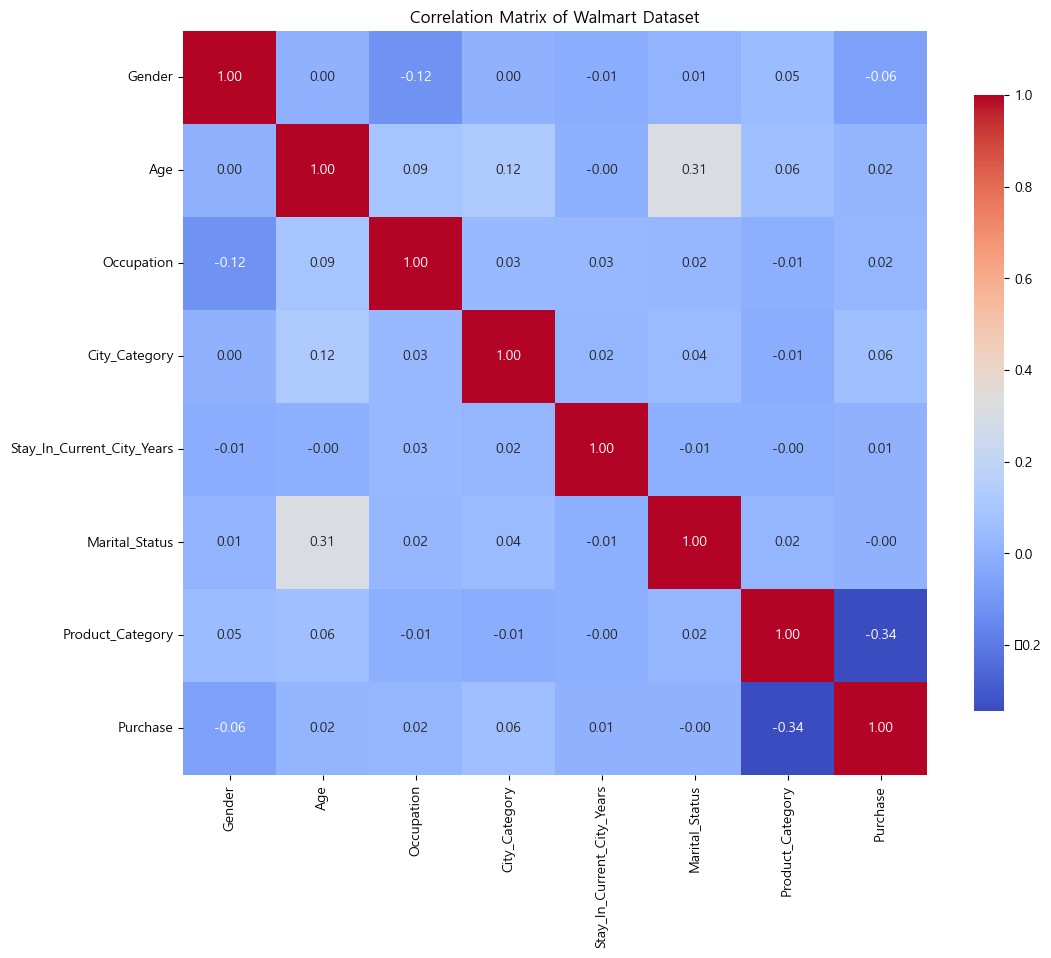

In [228]:
# 각 컬럼간의 상관관계를 히트맵으로 표현
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Walmart Dataset")
plt.show()

In [230]:
plt.rc('font', family='Malgun Gothic') #한글화

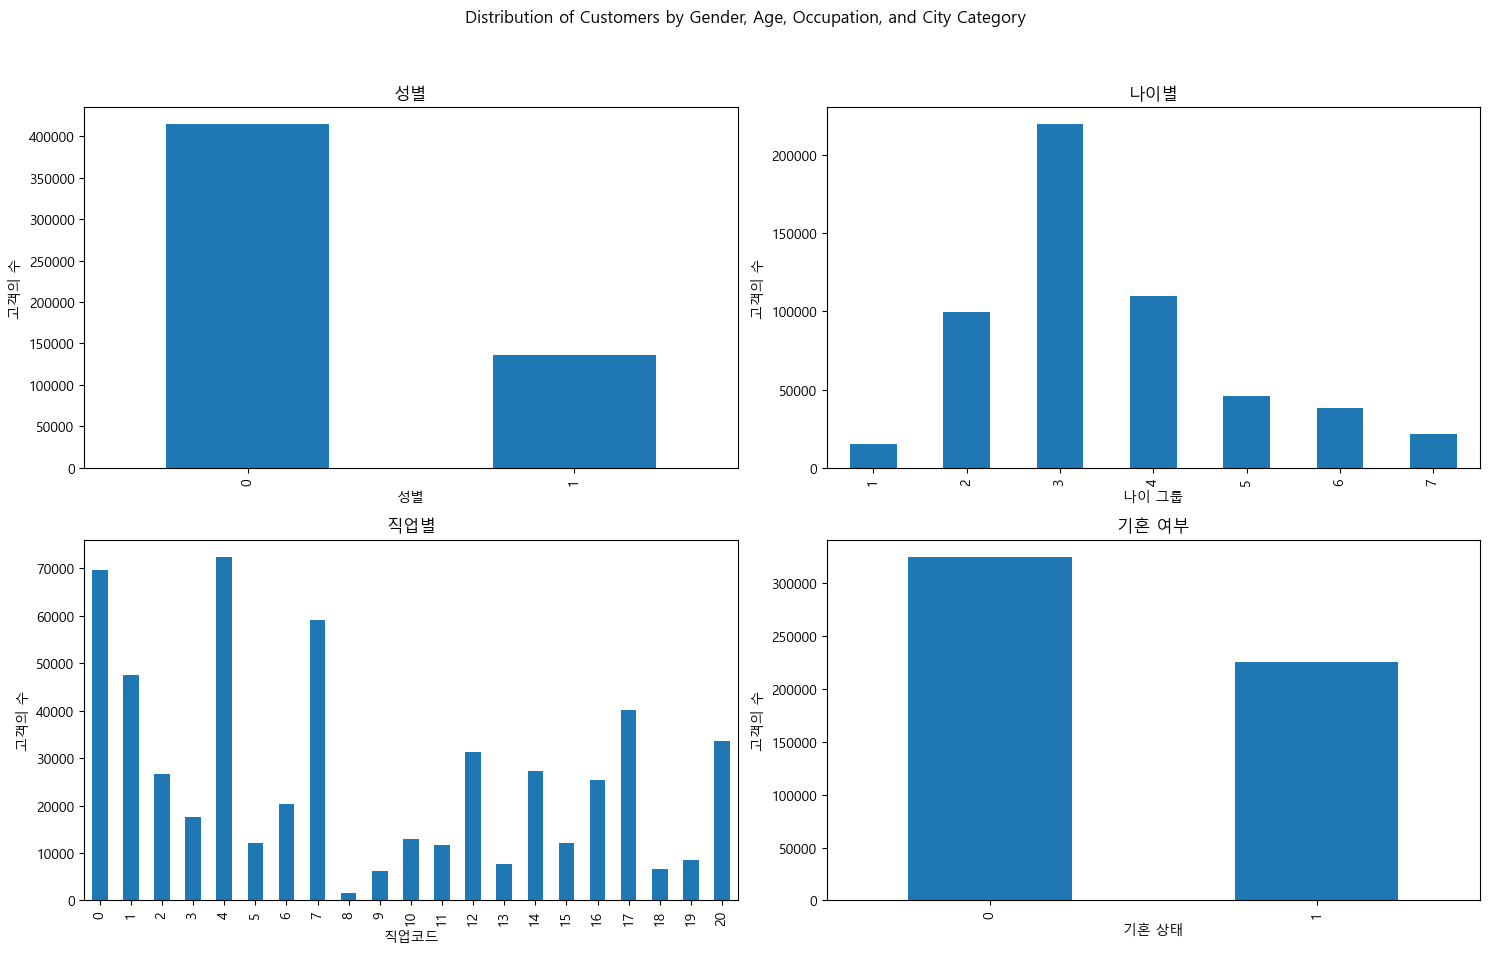

In [232]:
# 일단은 성별과 나이별, 직업별, 도시별로 어떠한 손님들이 주로 방문하는지 체크

# 그림 크기 및 레이아웃 설정
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of Customers by Gender, Age, Occupation, and City Category")

# 성별 분포
df['Gender'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('성별')
axs[0, 0].set_xlabel('성별')
axs[0, 0].set_ylabel('고객의 수')

# 연령대 분포
df['Age'].value_counts().sort_index().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('나이별')
axs[0, 1].set_xlabel('나이 그룹')
axs[0, 1].set_ylabel('고객의 수')

# 직업 분포
df['Occupation'].value_counts().sort_index().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('직업별')
axs[1, 0].set_xlabel('직업코드')
axs[1, 0].set_ylabel('고객의 수')

# 기혼 여부 분포
df['Marital_Status'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('기혼 여부')
axs[1, 1].set_xlabel('기혼 상태')
axs[1, 1].set_ylabel('고객의 수')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Walmart 고객 분포 분석

### 1. 성별 분포
- 남성(0)이 여성(1)보다 고객 수가 약 2배 이상 많다. 이는 주 고객층이 남성임을 시사하며, 마케팅 전략 수립 시 남성 고객을 주요 타겟으로 고려할 필요가 있으며 여성 고객 제품 확대시 추가적인 매출 확대도 가능할 것으로 보인다. 

### 2. 나이별 분포
- 나이 그룹 중 26-35세(3)와 18-25세(2) 고객이 가장 많으며, 그 뒤를 36-45세(4) 고객이 잇고 있다. 이 세 그룹을 타깃으로 하는 프로모션의 효과가 클 것으로 예상, 그 외 나이대에 대한 제품군은 시장 기호를 파악하고 확대하는 것 역시 필요할 것으로 보인다. 

### 3. 직업별 분포
- 다양한 직업군에서 고객이 분포하고 있으며, 특히 0, 1, 4, 7 코드의 직업군이 많은 비율을 차지, 이를 통해 직업에 따라 구매 패턴이 다를 수 있으므로, 상위 직업군을 대상으로 한 맞춤형 마케팅 전략이 필요합니다. 즉 특정 직업군에서 선호하는 상품군을 분석하여 집중 프로모션을 진행하면 효과를 극대화할 수 있을듯

### 4. 기혼여부별 분포
- 미혼 고객이 더 많기 때문에, 이들에 맞춘 프로모션과 상품 구성이 효과적일 수 있음. 그러나 기혼 고객도 적지 않으므로, 가족 단위 또는 가정용 제품군에 대한 마케팅도 유효할 것

<Figure size 1200x800 with 0 Axes>

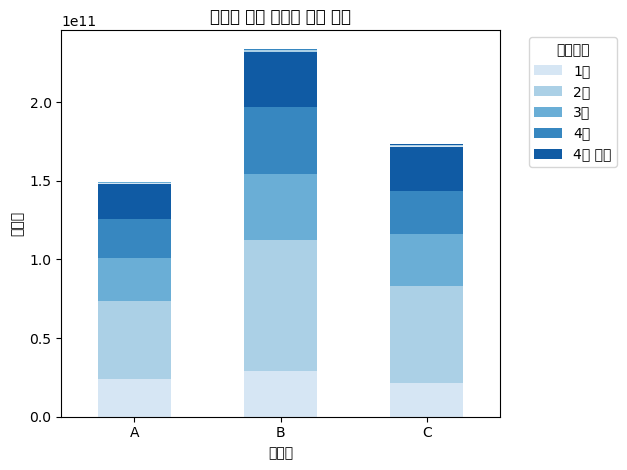

In [12]:
plt.figure(figsize=(12, 8))# 그래프 크기 설정

# 도시 카테고리와 거주 기간에 따른 고객 수 계산
df.groupby(['City_Category', 'Stay_In_Current_City_Years']).sum().unstack().fillna(0).plot(kind='bar', stacked=True, color=sns.color_palette("Blues", n_colors=5)) 
# 도시별, 거주기간별로 그룹화해 합한 값을 그래프 그래프로 표현, 이때 파란색으로 밝기차이를 적용

# 제목과 레이블 설정
plt.title("도시별 거주 기간과 고객 비율")
plt.xlabel("도시별")
plt.ylabel("고객별")
plt.xticks(rotation=0)

# 범례 설정 - "년" 단위 추가
legend_labels = ["1년", "2년", "3년", "4년", "4년 이상"]
plt.legend(title="거주기간", labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

# 레이아웃 조정 및 그래프 표시
plt.tight_layout()
plt.show()


### 5. 도시별 거주기간별 고객 비율
- **도시 2(B)의 인구가 가장 많으므로**에 맞춘 마케팅 전략을 강화할 수 있습니다. 해당 지역에 맞는 맞춤형 프로모션이나 상품 구성을 고려.
- 모든 도시에 **새롭게 유입된 고객**이 많은 점을 활용해, 신규 고객을 타겟으로 한 초기 할인 및 멤버십 혜택, 제품군 선정 같은 전략을 도입하면 효과적일듯.

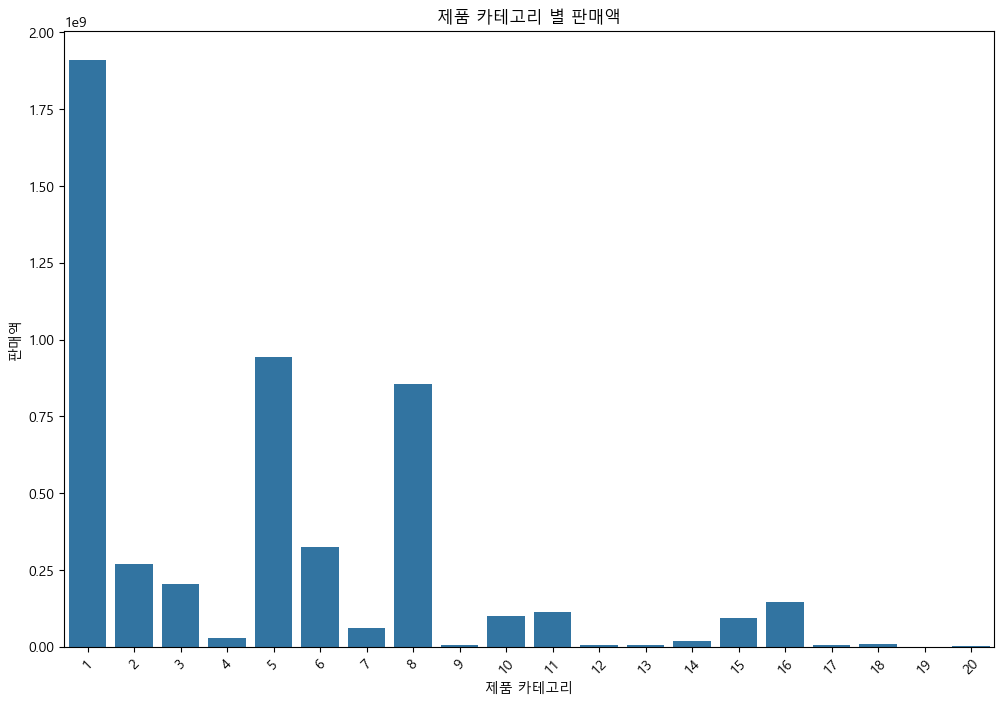

In [236]:
# 제품 유형별 총 매출 계산
product_sales = df.groupby('Product_Category')['Purchase'].sum().sort_values(ascending=False)

# 막대 그래프 그리기
plt.figure(figsize=(12, 8))
sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("제품 카테고리 별 판매액")
plt.xlabel("제품 카테고리")
plt.ylabel("판매액")
plt.xticks(rotation=45)
plt.show()

# Walmart 제품 카테고리별 판매액 분석

 **주요 매출 카테고리**
   - **카테고리 1**이 다른 모든 제품군을 압도하며 가장 높은 매출을 기록했으며 그 수요가 매우 강함을 알 수 있었으며 **카테고리 5**와 **카테고리 8**이 그 뒤를 이어 높은 매출을 차지, 해당 제품군이 가장 인기가 많았음을 확인할 수 있었음. 

   - **그 외 카테고리**는 1,5,8 카테고리에 비해 현저히 적은 매출 성과만을 보이는 중인 것으로 보임. 단순히 수요가 낮은 제품이 아니라면 제품의 인지도, 마케팅의 부족함인지 확인하고 추가적인 조치를 고안해봐야 할듯

   - **최종적으로** 그 방향성을 구체화하기 위해 제품 카테고리 별로 어떠한 유형의 고객들이 있는지 파악해 실질적인 개선 방안을 모색하고자 함. 

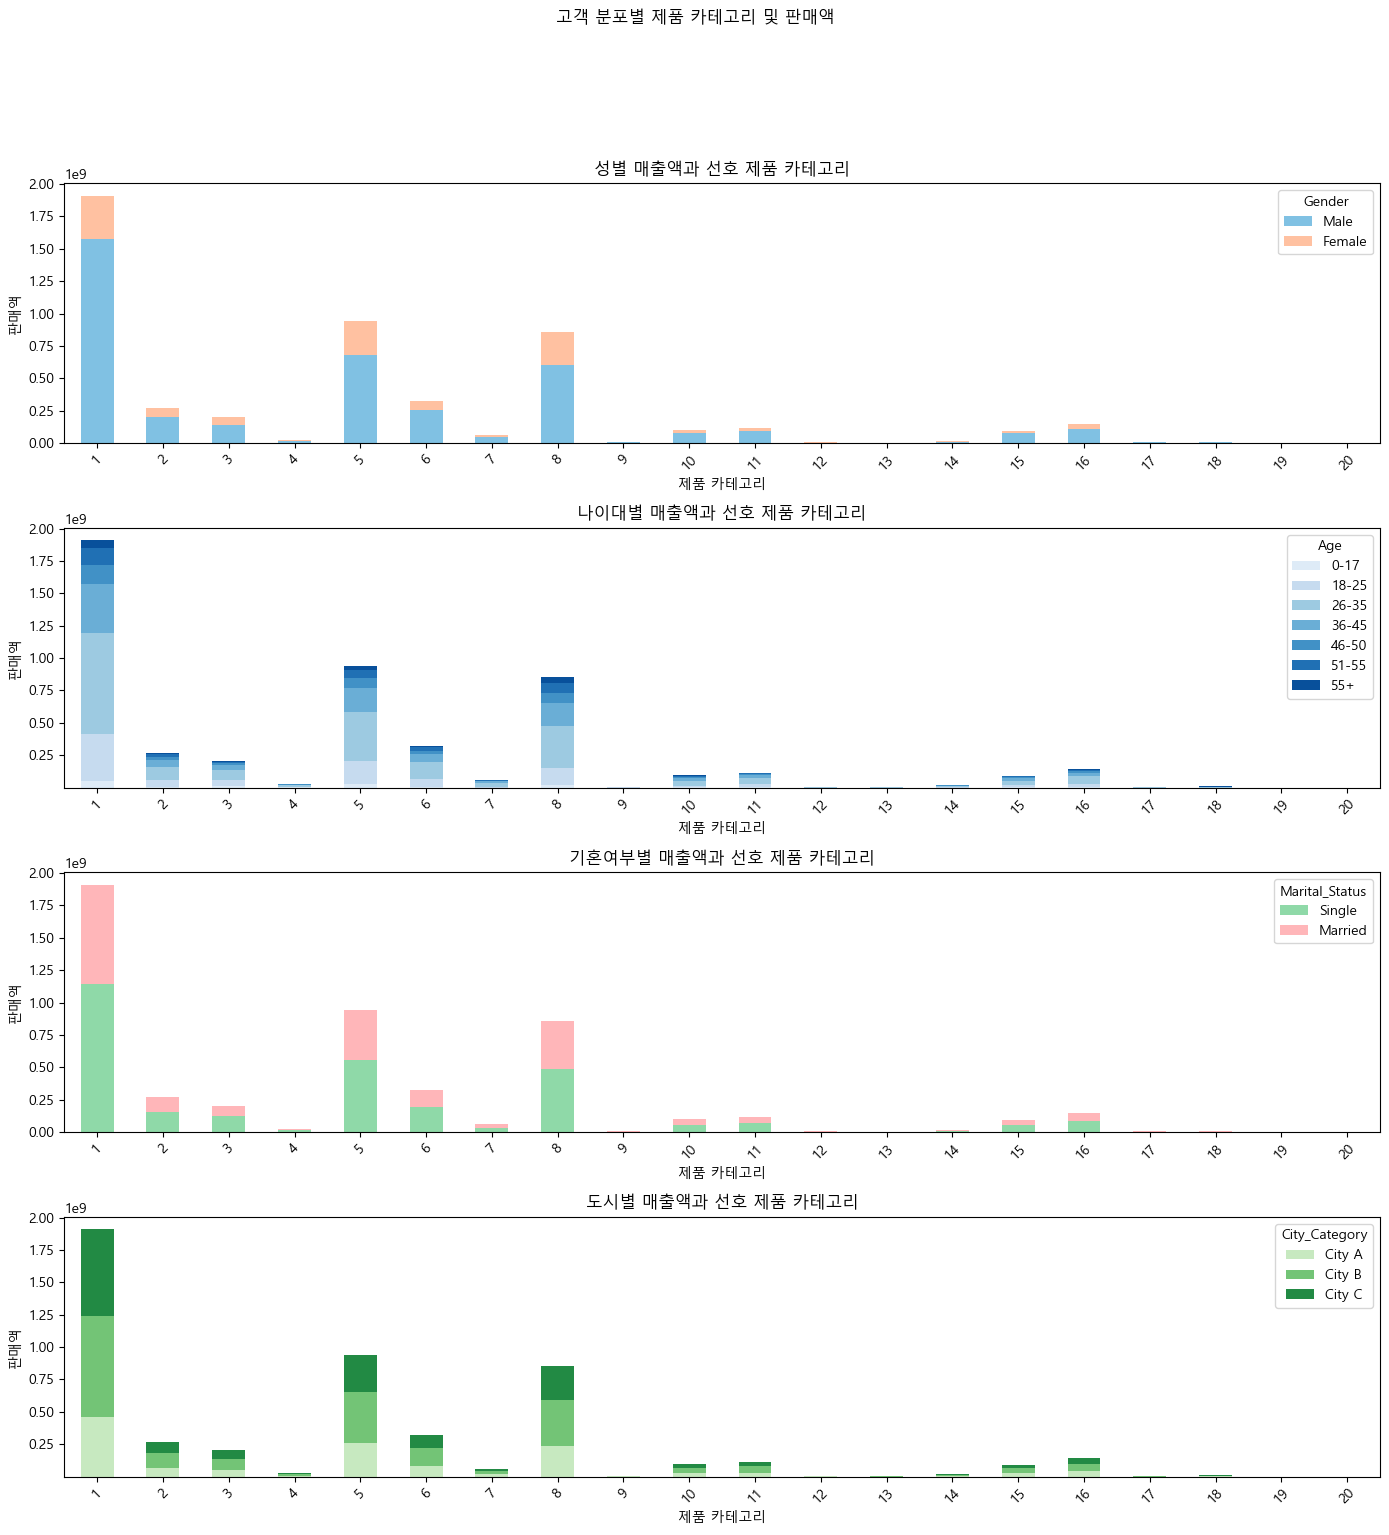

In [238]:
# 고객별 정보( : 성별, 기혼 여부, 지역별, 나이 그룹)에 따른 매출 분석을 위한 그룹 리스트
group_by_list = [
    ('Gender', ['#80C1E3', '#FFC1A1'], "성별 매출액과 선호 제품 카테고리", ["Male", "Female"]),
    ('Age', sns.color_palette("Blues", n_colors=7), "나이대별 매출액과 선호 제품 카테고리", ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"]),
    ('Marital_Status', ['#8FD9A8', '#FFB6B9'], "기혼여부별 매출액과 선호 제품 카테고리", ["Single", "Married"]),
    ('City_Category', sns.color_palette("Greens", n_colors=3), "도시별 매출액과 선호 제품 카테고리", ["City A", "City B", "City C"])

]

# 그림 크기 설정 및 서브플롯 생성
fig, axs = plt.subplots(len(group_by_list), 1, figsize=(14, 15)) #가로로 길게 하여 단번에 파악할 수 있게끔 가시성을 높임
fig.suptitle("고객 분포별 제품 카테고리 및 판매액", y=1.02)

# 각 그룹별 누적 막대 그래프 생성, 이때 그래프에 입력될 라벨값들을 위에서 생성한 리스트의 튜플 요소들 값으로 불러옴
for i, (group, colors, title, legend_labels) in enumerate(group_by_list):

    df.groupby(['Product_Category', group])['Purchase'].sum().unstack().fillna(0).plot(kind='bar', stacked=True, color=colors, ax=axs[i], legend=False)
    # 누적 막대 그래프, 순서대로 해석하면 우선 그룹화 시켜 이를  sum하여 행을 열로 변환*unstack시켜 결측치를 제거한다. 즉 하나의 막대를 쪼개는 역할
    axs[i].set_title(title) #타이들을 변수로 받아옴
    axs[i].set_xlabel("제품 카테고리")
    axs[i].set_ylabel("판매액")
    axs[i].tick_params(axis='x', rotation=45)
    
    # 범례를 설정해 그래프의 가시성을 높임
    handles, _ = axs[i].get_legend_handles_labels() #그래프의 내용이 담긴 객체를 불러와 그래의 대한 것은 handles객체에 저장
    axs[i].legend(handles, legend_labels, title=group, loc='upper right') #해당 객체에 대해 범례를 리스트로 저장된 객체(legend_labels)로 불러와 표현

# 레이아웃 조정 및 그래프 표시
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# Walmart 제품 카테고리별 매출 분석 (성별, 나이대, 기혼 여부, 도시별)

### 1. 성별 매출과 선호 제품 카테고리
  - **카테고리 1**에서 남성의 매출이 압도적으로 높으며, **카테고리 5와 8**에서도 남성이 높은 매출을 보임
  - 남성 고객을 대상으로 한 마케팅이 효과적일 가능성이 높으며, 여성 고객의 선호도가 상대적으로 높은 제품군과 여성이 선호하는 제품에 대한 확대가 필요해보임.

### 2. 나이대별 매출과 선호 제품 카테고리
  - **26-35세와 18-25세 고객이 Walmart의 주요 소비층**으로 보이며, 이들 연령대에 맞춘 상품 구성이 효과적일 수 있습니다. 특히, 26-35세 연령대는 주요 제품 카테고리에서 높은 매출을 보이고 있어 집중적인 마케팅이 필요합니다.

### 3. 기혼 여부에 따른 매출과 선호 제품 카테고리
  - **카테고리 1**과 **카테고리 5**에서 미혼 고객의 매출이 두드러지며, 이는 Walmart의 주요 매출을 차지하는 고객층이 미혼임을 시사
  - 미혼 고객을 위한 마케팅 전략이 효과적일 가능성이 높음. 기혼 고객이 선호하는 카테고리 8에 대해서는 가족 단위의 프로모션이나 혜택을 제공하면 매출에 도움이 될 것

### 4. 도시별 매출과 선호 제품 카테고리
- 도시 B를 중심으로 한 마케팅 전략이 유효할 가능성이 높음. 그러나 도시 A와 C도 상대적으로 큰 매출을 기록하고 있으므로, 이들 지역을 대상으로 한 맞춤형 캠페인도 고려하면 매출에 도움이 될 것

# Walmart 구매액 상위 1만명 고객에 대한 분포 분석

- **VIP 고객 특성**:
  - 성별: 남성 고객 비율이 높음
  - 나이대: 26-35세가 가장 많으며, 18-45세 연령대가 주를 이룸
  - 직업: 직업군(코드 0, 4, 7, 17)에 고객이 가장 많았음
  - 기혼 여부: 미혼 고객 비율이 높음
  - 지역: City B와 City C에 많이 분포
  
- **최종**:
  - 주요 연령대인 18-45세, 특히 26-35세를 타겟으로 한 프로모션을 진행
  - 남성 고객을 위한 맞춤형 상품 및 서비스를 제공
  - 미혼 고객의 라이프스타일에 맞춘 제품 추천 및 혜택 제공
  - City B와 City C 지역에 특화된 로컬 마케팅 강화

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_72832\2345383104.py:51: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


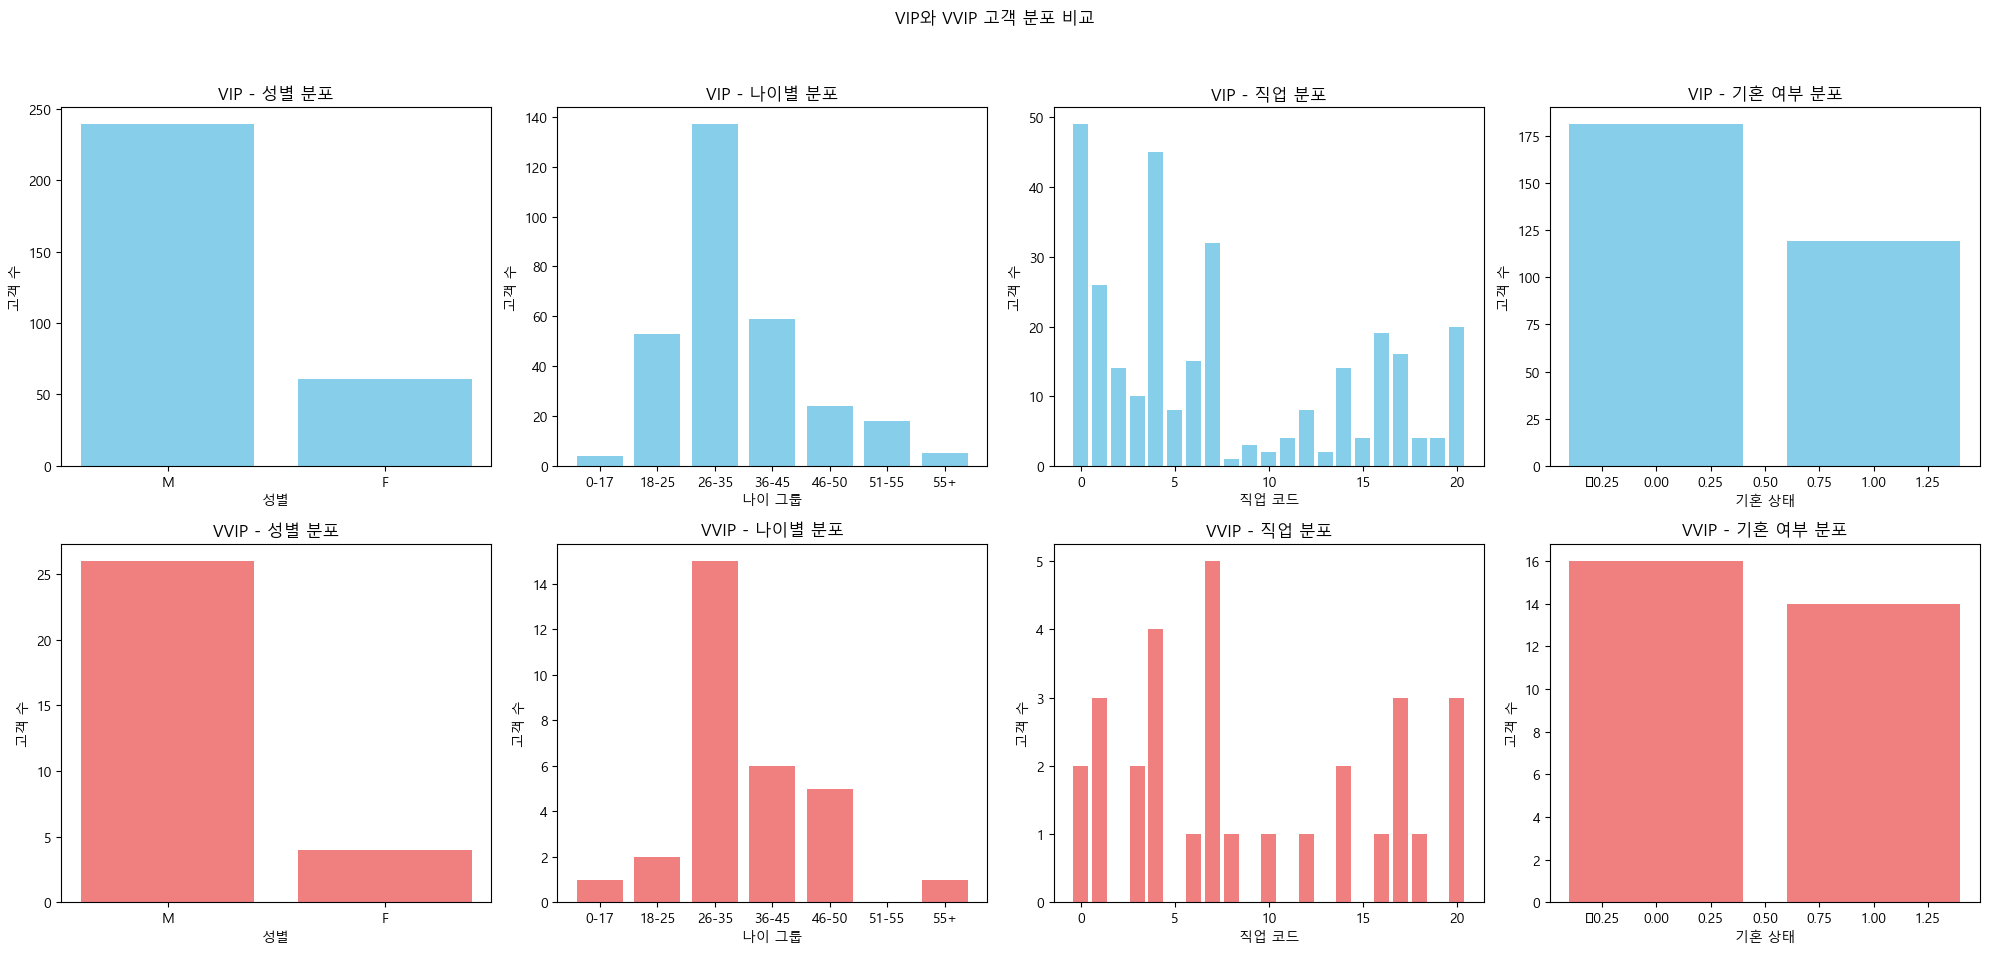

In [252]:
## vip와 VVIP의 인구 분포 분석 

age_order = ["0-17", "18-25", "26-35", "36-45", "46-50", "51-55", "55+"] # 미리 정의된 나이 그룹 순서

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle("VIP와 VVIP 고객 분포 비교")

# VIP 데이터 분포 그래프
axs[0, 0].bar(vip_users['Gender'].value_counts().index, vip_users['Gender'].value_counts().values, color="skyblue")
axs[0, 0].set_title("VIP - 성별 분포")
axs[0, 0].set_xlabel("성별")
axs[0, 0].set_ylabel("고객 수")

axs[0, 1].bar(vip_users['Age'].value_counts().reindex(age_order).index, vip_users['Age'].value_counts().reindex(age_order).values, color="skyblue")
axs[0, 1].set_title("VIP - 나이별 분포")
axs[0, 1].set_xlabel("나이 그룹")
axs[0, 1].set_ylabel("고객 수")

axs[0, 2].bar(vip_users['Occupation'].value_counts().index, vip_users['Occupation'].value_counts().values, color="skyblue")
axs[0, 2].set_title("VIP - 직업 분포")
axs[0, 2].set_xlabel("직업 코드")
axs[0, 2].set_ylabel("고객 수")

axs[0, 3].bar(vip_users['Marital_Status'].value_counts().index, vip_users['Marital_Status'].value_counts().values, color="skyblue")
axs[0, 3].set_title("VIP - 기혼 여부 분포")
axs[0, 3].set_xlabel("기혼 상태")
axs[0, 3].set_ylabel("고객 수")

# VVIP 데이터 분포 그래프
axs[1, 0].bar(vvip_users['Gender'].value_counts().index, vvip_users['Gender'].value_counts().values, color="lightcoral")
axs[1, 0].set_title("VVIP - 성별 분포")
axs[1, 0].set_xlabel("성별")
axs[1, 0].set_ylabel("고객 수")

axs[1, 1].bar(vvip_users['Age'].value_counts().reindex(age_order).index, vvip_users['Age'].value_counts().reindex(age_order).values, color="lightcoral")
axs[1, 1].set_title("VVIP - 나이별 분포")
axs[1, 1].set_xlabel("나이 그룹")
axs[1, 1].set_ylabel("고객 수")

axs[1, 2].bar(vvip_users['Occupation'].value_counts().index, vvip_users['Occupation'].value_counts().values, color="lightcoral")
axs[1, 2].set_title("VVIP - 직업 분포")
axs[1, 2].set_xlabel("직업 코드")
axs[1, 2].set_ylabel("고객 수")

axs[1, 3].bar(vvip_users['Marital_Status'].value_counts().index, vvip_users['Marital_Status'].value_counts().values, color="lightcoral")
axs[1, 3].set_title("VVIP - 기혼 여부 분포")
axs[1, 3].set_xlabel("기혼 상태")
axs[1, 3].set_ylabel("고객 수")

# 레이아웃 조정 및 표시
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


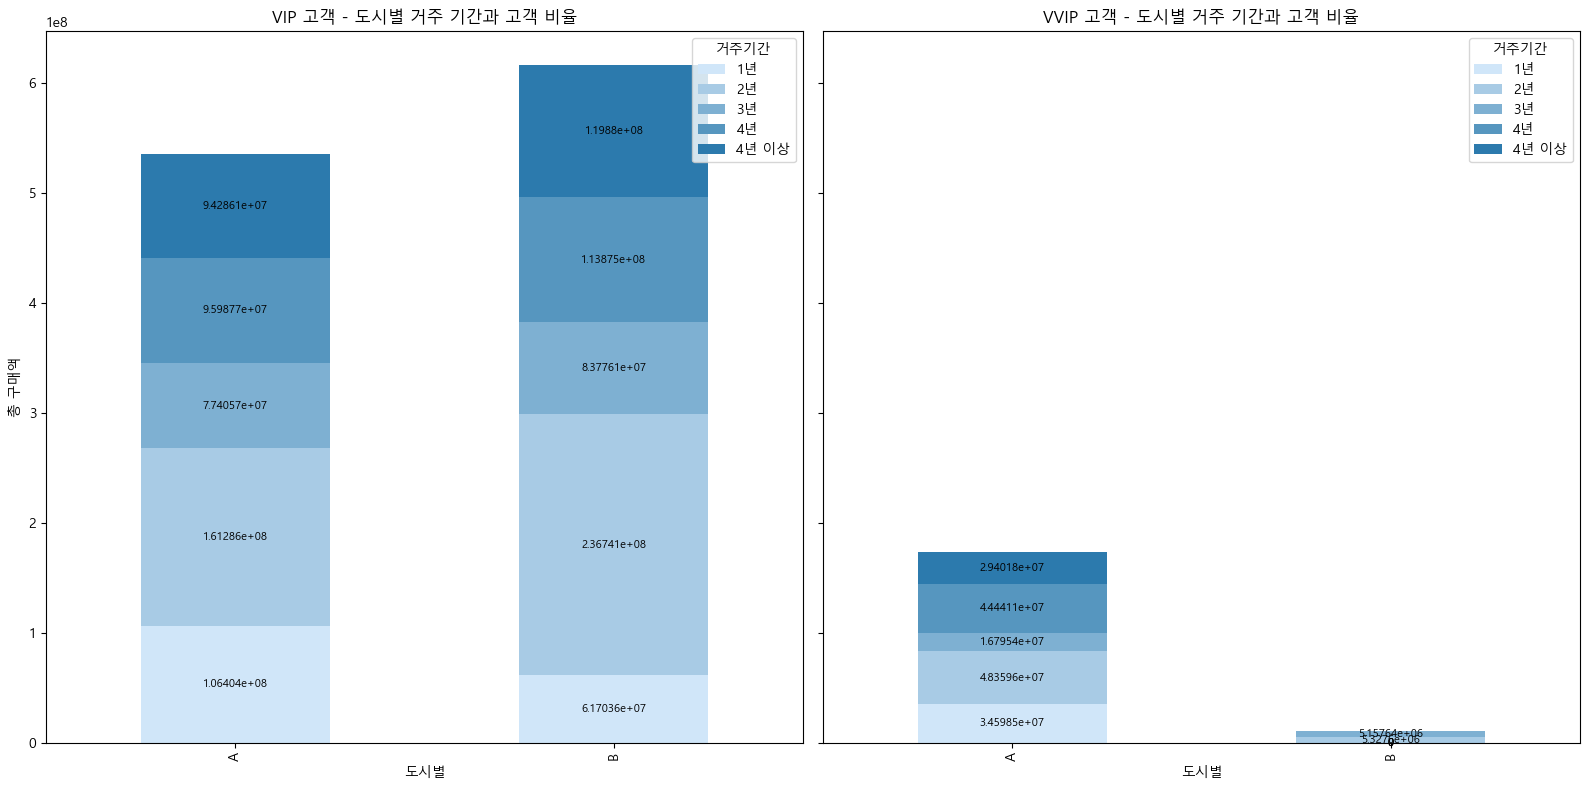

In [256]:
import matplotlib.pyplot as plt

# 데이터 준비: 도시와 거주 기간별 VIP, VVIP 고객들의 총 구매액을 계산
city_stay_vip = vip_users.groupby(['City_Category', 'Stay_In_Current_City_Years'])['Purchase'].sum().unstack().fillna(0)
city_stay_vvip = vvip_users.groupby(['City_Category', 'Stay_In_Current_City_Years'])['Purchase'].sum().unstack().fillna(0)

# 그래프 생성
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
colors = ["#d0e6f9", "#a8cbe5", "#7eb0d2", "#5696bf", "#2c7aad"]

# VIP 고객 그래프
city_stay_vip.plot(kind='bar', stacked=True, color=colors, ax=axs[0])
axs[0].set_title("VIP 고객 - 도시별 거주 기간과 고객 비율")
axs[0].set_xlabel("도시별")
axs[0].set_ylabel("총 구매액")
for container in axs[0].containers:
    axs[0].bar_label(container, label_type='center', fontsize=8)

# VVIP 고객 그래프
city_stay_vvip.plot(kind='bar', stacked=True, color=colors, ax=axs[1])
axs[1].set_title("VVIP 고객 - 도시별 거주 기간과 고객 비율")
axs[1].set_xlabel("도시별")
for container in axs[1].containers:
    axs[1].bar_label(container, label_type='center', fontsize=8)

# 범례 설정
axs[0].legend(title="거주기간", labels=["1년", "2년", "3년", "4년", "4년 이상"], loc='upper right')
axs[1].legend(title="거주기간", labels=["1년", "2년", "3년", "4년", "4년 이상"], loc='upper right')

# 레이아웃 조정
plt.tight_layout()
plt.show()


In [260]:
vip_users['City_Category'].value_counts()

City_Category
B    175
A    125
Name: count, dtype: int64

In [262]:
vvip_users['City_Category'].value_counts()

City_Category
A    28
B     2
Name: count, dtype: int64

# 박성훈

In [8]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../../data/data_anal_proj/walmart.csv')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

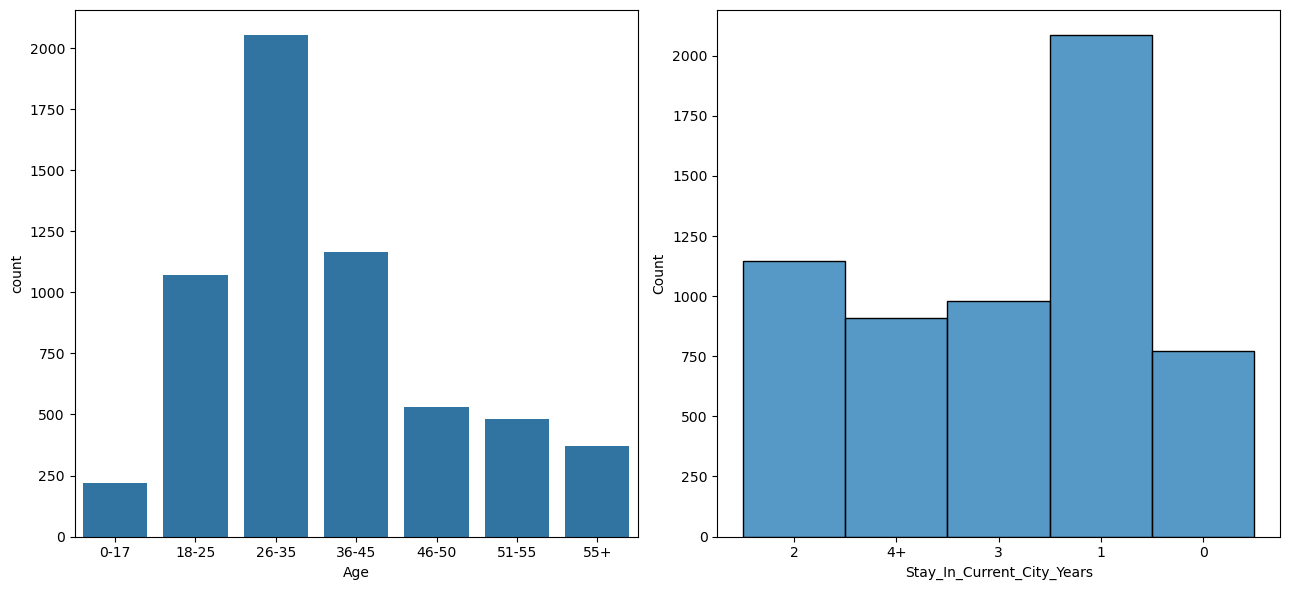

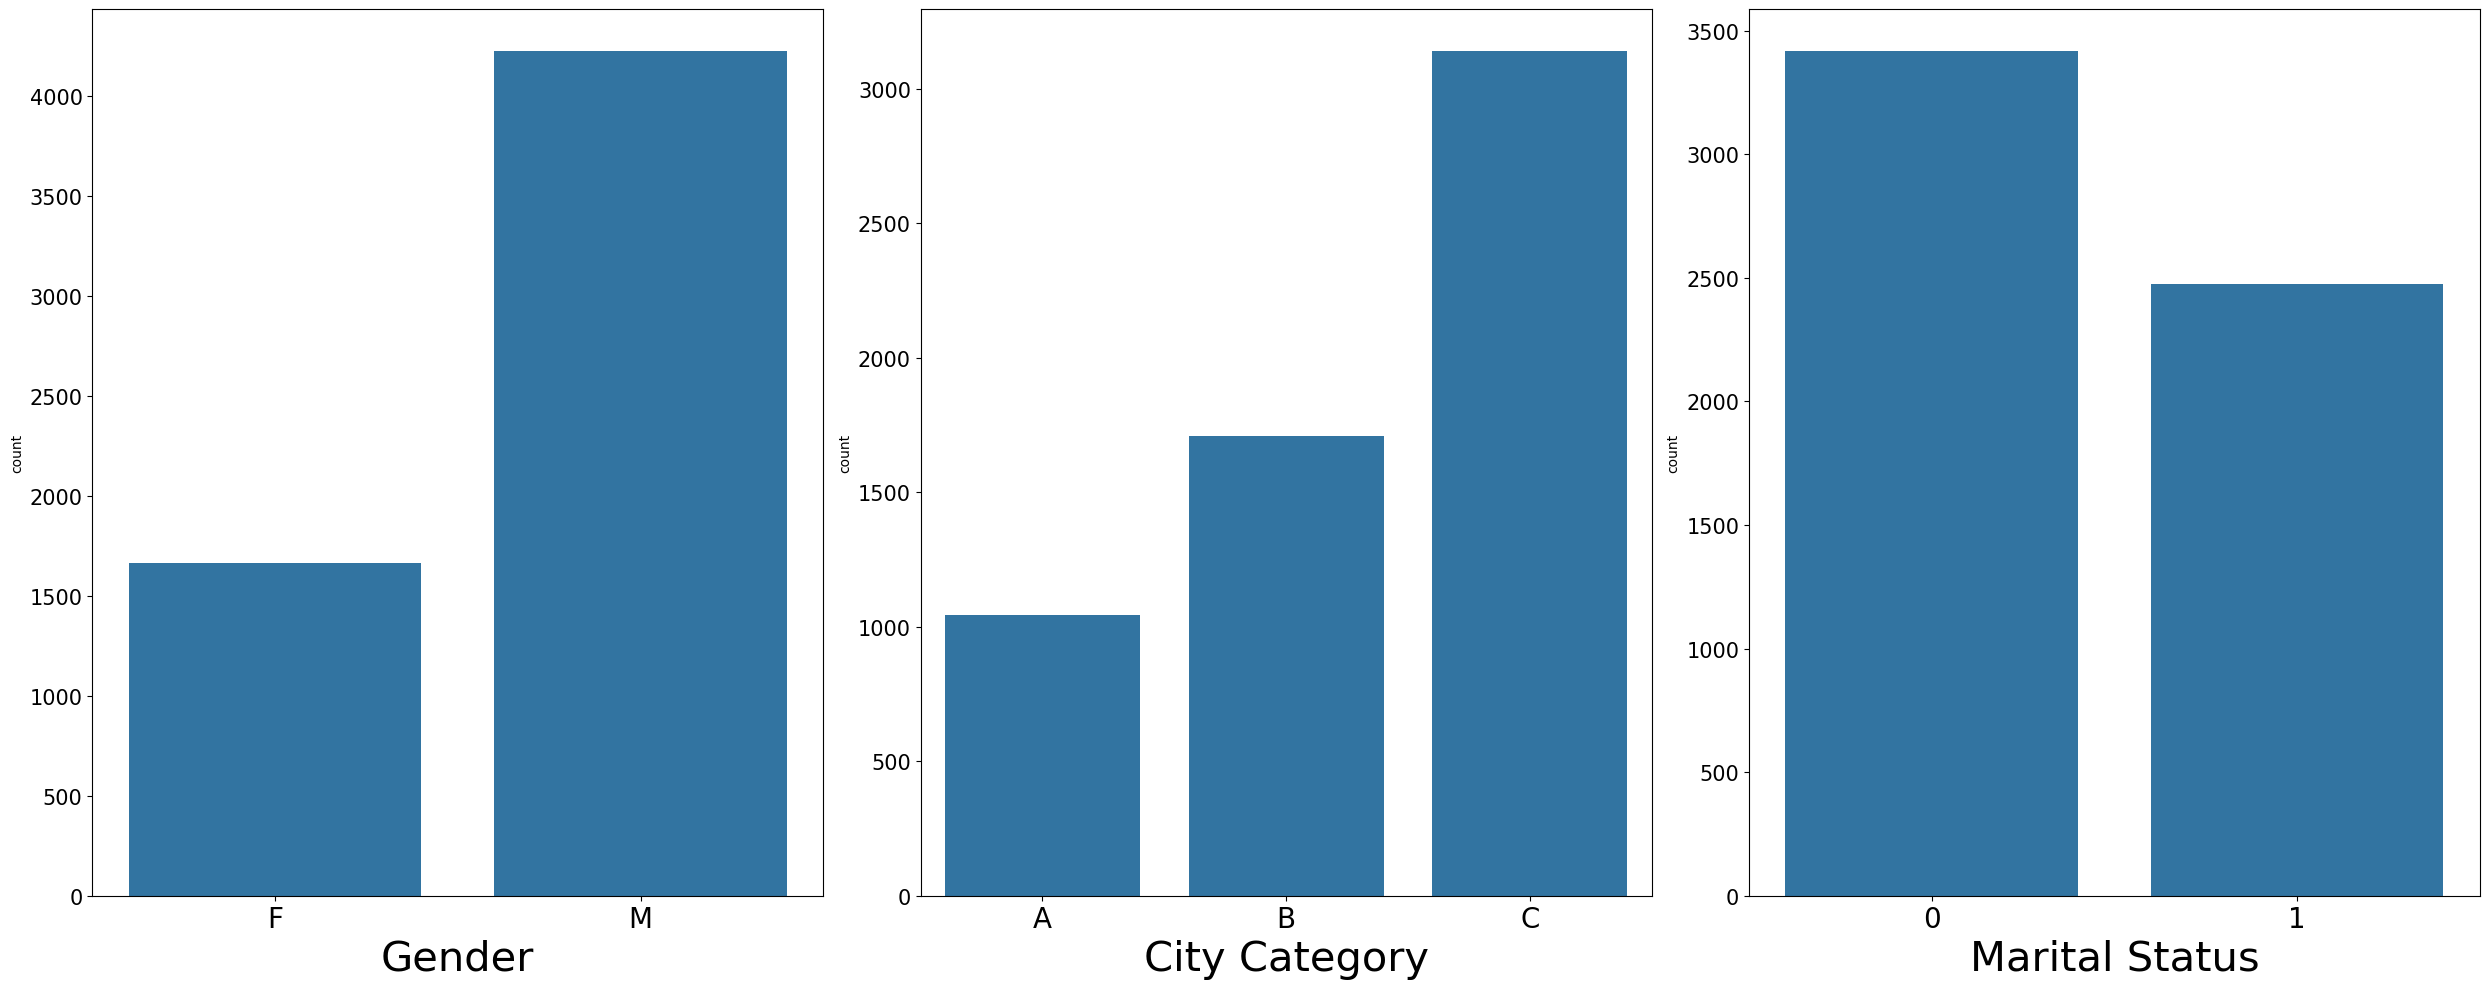

In [13]:
# 회원 중복 제외한 유니크한 값만 남기기
df_uniq = df.copy()
df_uniq = df_uniq[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']]
df_uniq = df_uniq.drop_duplicates()

# 연속형 변수인 Age(?)와 Stay_In_Current_City_Years 히스토그램 
### age를 연속형 변수라 생각해서 히스토그램을 그리는걸로 했는데 이게 맞는 생각일까요?
hist, ax = plt.subplots(1,2, figsize=(13, 6))
sns.countplot(data=df_uniq, x='Age', ax = ax[0], order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.histplot(data=df_uniq, x='Stay_In_Current_City_Years', ax = ax[1], discrete=True)
hist.set_tight_layout(True)
plt.show()

# 범주형 변수인 Gender와 City_Category, Marital_Status 에 대한 Count plot
count, ax = plt.subplots(1,3, figsize=(25, 10))
sns.countplot(data=df_uniq, x='Gender', ax=ax[0])
ax[0].set_xlabel('Gender', fontsize=30)
sns.countplot(data=df_uniq, x='City_Category', ax=ax[1], order=['A','B','C'])
ax[1].set_xlabel('City Category', fontsize=30)
sns.countplot(data=df_uniq, x='Marital_Status', ax=ax[2])
ax[2].set_xlabel('Marital Status', fontsize=30)
for axis in ax:
    axis.tick_params(axis='x', labelsize=20)
    axis.tick_params(axis='y', labelsize=15)
count.set_tight_layout(True)
plt.show()

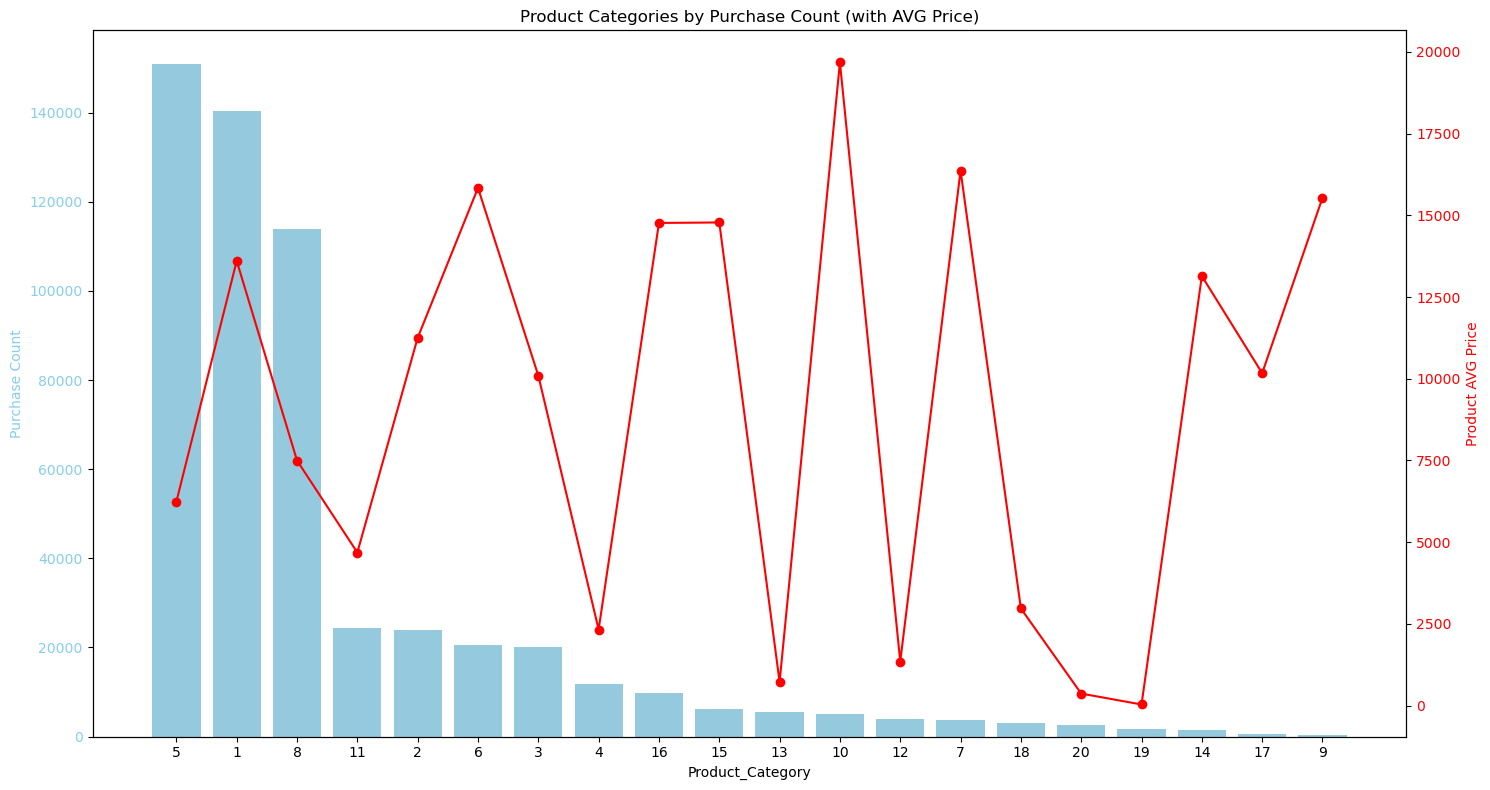

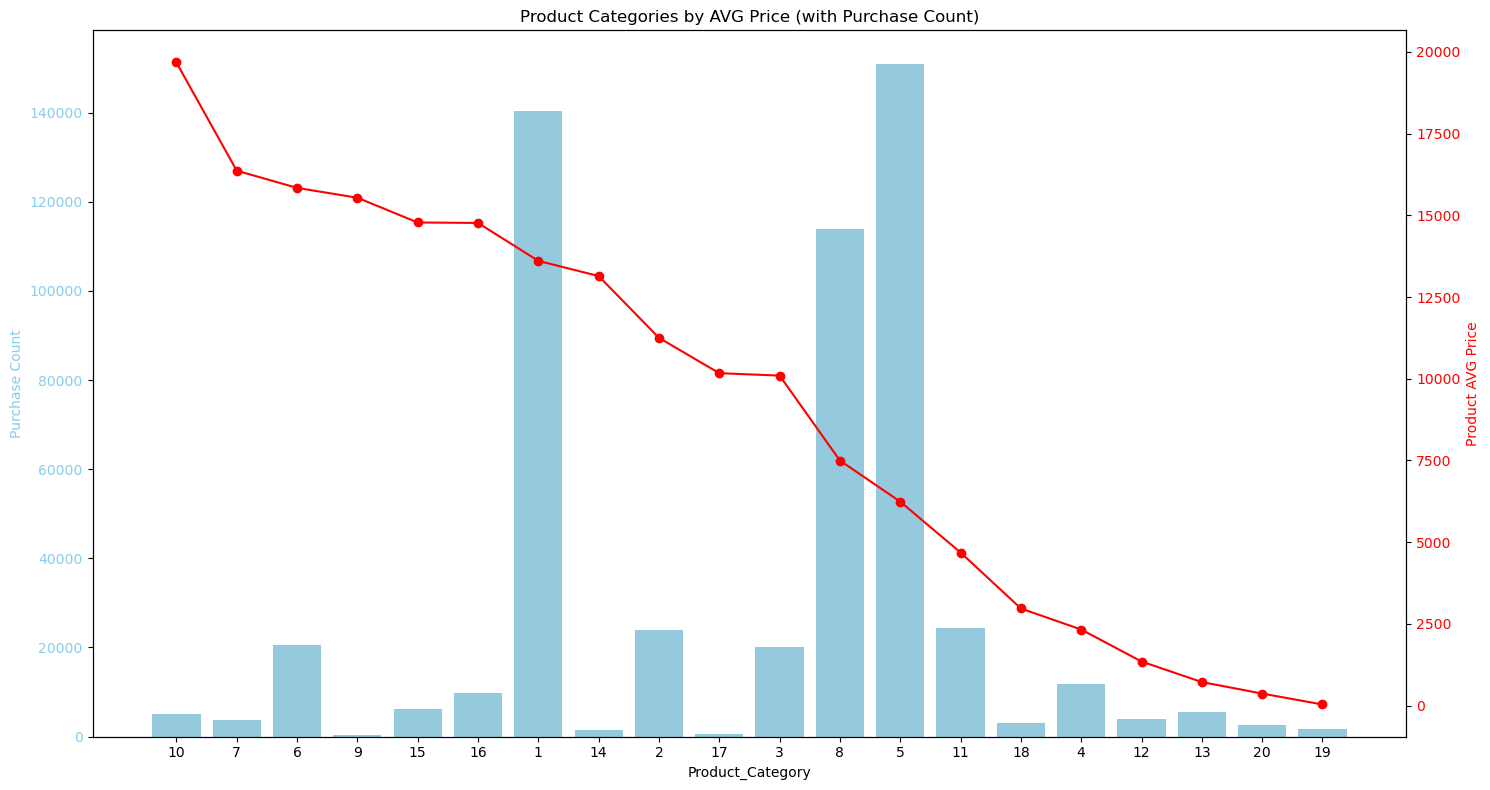

In [14]:
# 제품 카테고리별 구매금액 합산 데이터프레임 생성
df_purchase_category = df.copy()
category_purchase_sum = df_purchase_category.groupby('Product_Category')['Purchase'].sum().reset_index()

# 제품 카테고리별 구매 횟수와 총 구매금액 합치는 데이터 프레임 생성
product_df = pd.merge(category_purchase_sum, df.Product_Category.value_counts().reset_index(), on='Product_Category')
product_df.columns = ['Product_Category', 'Purchase', 'Purchase_Count']
product_df['Product_AVG_Price'] = product_df.Purchase / product_df.Purchase_Count

def plot_count_with_avg_price(df, sort_by, title):
    # 데이터 정렬 후 역순으로 뒤집기
    df_sorted = df.sort_values(by=sort_by, ascending=False).reset_index(drop=True)
    # df_sorted = df_sorted.iloc[::-1].reset_index(drop=True)
    
    fig, ax1 = plt.subplots(figsize=(15, 8))
    
    # Purchase_Count 막대 그래프
    sns.barplot(x='Product_Category', y='Purchase_Count', data=df_sorted, order=df_sorted['Product_Category'], ax=ax1, color='skyblue')
    
    # 왼쪽 y축 레이블 설정
    ax1.set_ylabel('Purchase Count', color='skyblue')
    ax1.tick_params(axis='y', labelcolor='skyblue')
    
    # 오른쪽 y축 생성
    ax2 = ax1.twinx()
    
    # Product_AVG_Price 선 그래프
    ax2.plot(range(len(df_sorted)), df_sorted['Product_AVG_Price'], color='red', marker='o')
    ax2.set_ylabel('Product AVG Price', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # x축 아래에 Product_Category 표시
    ax1.set_xticks(range(len(df_sorted)))
    ax1.set_xticklabels([f'{cat}' for cat in df_sorted['Product_Category']])
    
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Purchase_Count 순으로 정렬된 차트
plot_count_with_avg_price(product_df, 'Purchase_Count', 'Product Categories by Purchase Count (with AVG Price)')

# Product_AVG_Price 순으로 정렬된 차트
plot_count_with_avg_price(product_df, 'Product_AVG_Price', 'Product Categories by AVG Price (with Purchase Count)')

1. 구매 횟수로 봤을 때 5번 1번 8번 상품 카테고리가 가장 많았고, 5,1,8은 생필품으로 추정됨
2. 전체 구매 금액에서 구매 횟수로 나눈 제품 카테고리의 평균 가격으로 봤을 때 10,7이 가장 높으면서 구매 횟수는 낮았기 때문에 10번과 7번은 사치품으로 추정

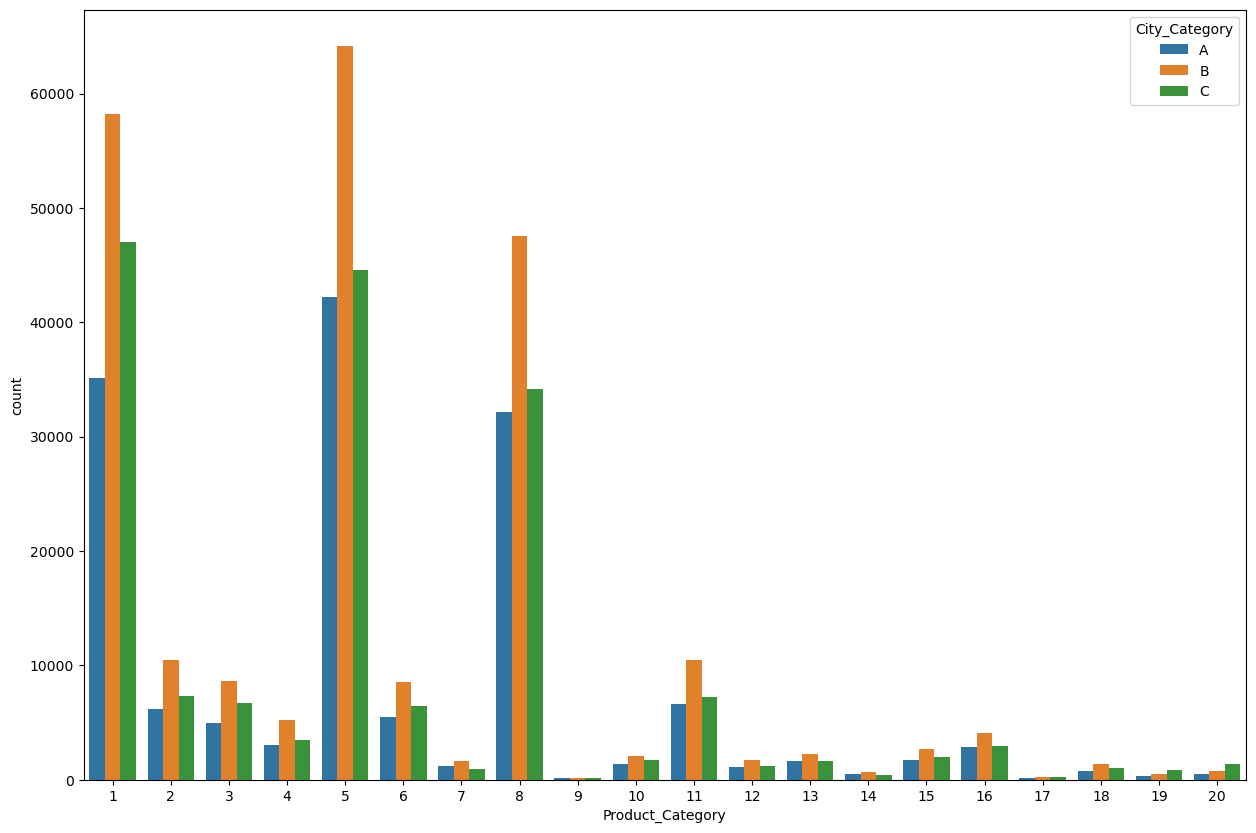

In [15]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Product_Category', hue='City_Category')
plt.show()

위의 차트와 비교해서 도시별 특징을 찾아내고 싶었는데 딱히 유의미한 결과는 없어보임

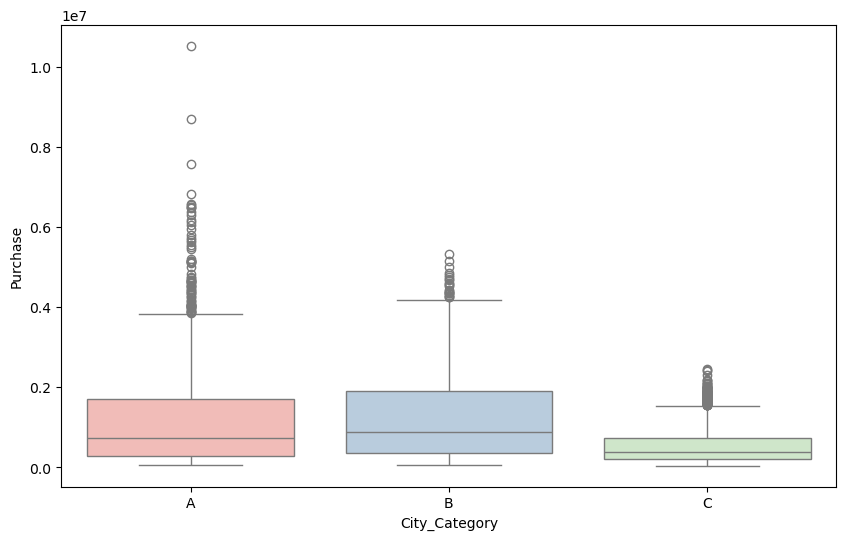

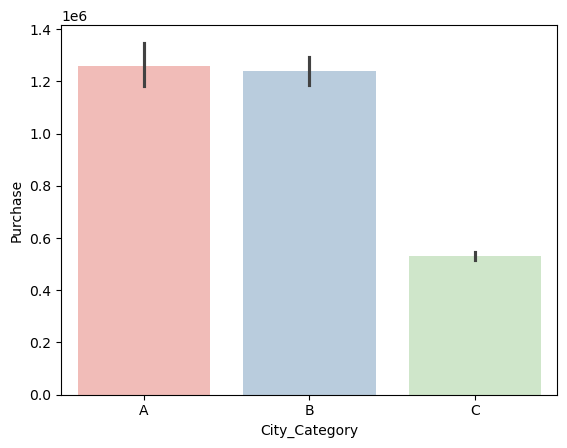

In [28]:
df_uniq = df.copy()
df_uniq = df_uniq[['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']]
df_uniq = df_uniq.drop_duplicates()
df_uniq_index = df_uniq.set_index('User_ID')

df_purchase = df.copy()
df_purchase = df_purchase[['User_ID','Purchase']]
df_purchase.groupby('User_ID').sum()

df_uniq_index['Purchase'] = df_purchase.groupby('User_ID').sum()

plt.subplots(figsize=(10, 6))
sns.boxplot(data=df_uniq_index, x='City_Category', y='Purchase', palette='Pastel1', order=['A','B','C'])
plt.show()

sns.barplot(data=df_uniq_index, x='City_Category', y='Purchase', estimator=np.mean, palette='Pastel1', order=['A','B','C'])
plt.show()

- C도시에 회원이 가장 많지만 개개인의 구매력은 가장 떨어진다.
- C 도시의 평균 구매력이 현저히 떨어지는 것을 bar plot에서도 알 수 있다.
- B 도시가 전체적인 개개인의 구매력은 높지만 A도시에 개개인의 구매력이 현저하게 높은 VIP 고객들이 많이 위치한 것으로 보임

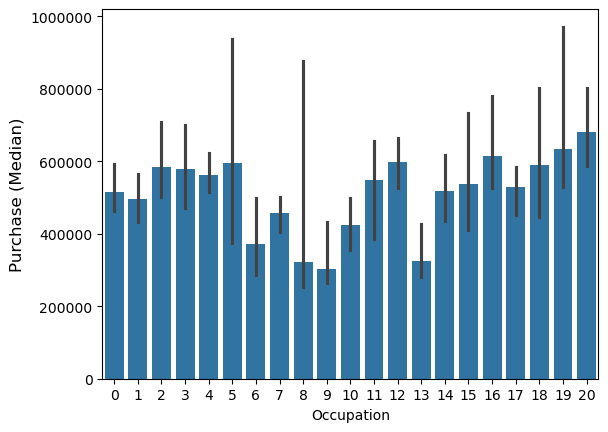

In [29]:
ax = sns.barplot(data=df_uniq_index, x='Occupation', y='Purchase', estimator=np.median)
def format_func(value, tick_number):
    return int(value)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.ylabel('Purchase (Median)', fontsize=12)
plt.show()

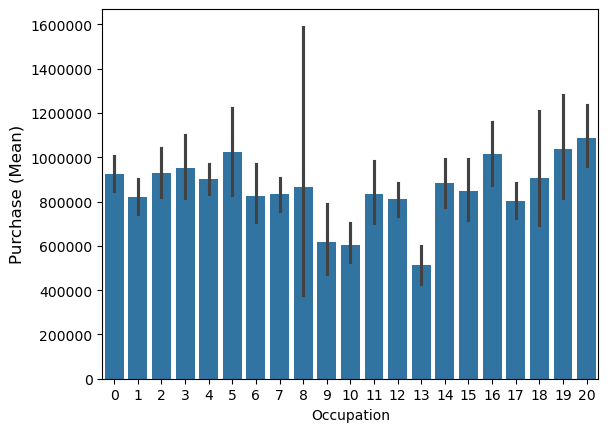

In [30]:
ax = sns.barplot(data=df_uniq_index, x='Occupation', y='Purchase', estimator=np.mean)
def format_func(value, tick_number):
    return int(value)
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.ylabel('Purchase (Mean)', fontsize=12)
plt.show()

1. 직업별 소득이 크게 차이나 구매력에도 큰 편차가 있을 것으로 예상했기 때문에 median 값으로 봤다.
2. 20번 직업의 구매력이 가장 뛰어남
3. 9번과 13번의 구매력이 가장 낮음
4. 8번의 구매력이 편차가 가장 심한 것으로 보임